In [20]:
import pandas as pd
import requests
from io import BytesIO #permet de stocker en mémoire
from zipfile import ZipFile
import matplotlib.pyplot as plt


In [4]:
url2019 = "https://www.insee.fr/fr/statistiques/fichier/4809583/fd_eec19_csv.zip" #enquete 2019
url2020="https://www.insee.fr/fr/statistiques/fichier/5393560/fd_eec20_csv.zip" #enquête 2020 en exemple

# Télécharge le fichier ZIP
requete = requests.get(url2019)
zip_df = ZipFile(BytesIO(requete.content)) #créer un fichier ZIP

# Extraire le fichier CSV du ZIP
with zip_df.open(zip_df.namelist()[0]) as extrait:
    EEC_2019 = pd.read_csv(extrait, delimiter=";") # Lire le fichier CSV avec pandas

# Télécharge le fichier ZIP
requete = requests.get(url2020)
zip_df = ZipFile(BytesIO(requete.content)) #créer un fichier ZIP

# Extraire le fichier CSV du ZIP
with zip_df.open(zip_df.namelist()[0]) as extrait:
    EEC_2020 = pd.read_csv(extrait, delimiter=";") # Lire le fichier CSV avec pandas

## Statistique desc

In [8]:
EEC_2019.head()

,ANNEE,TRIM,CATAU2010R,METRODOM,TYPMEN7,AGE3,AGE5,COURED,ENFRED,NFRRED,...,DIP11,CSTOTPRM,IDENTM,EXTRIAN,EMPNBH,HREC,HHCE,HPLUSA,JOURTR,NBTOTE
0,2019,1,1,1,1,50,60,2,2,1.0,...,70.0,86.0,1,107.749722,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,2,1,1,3,50,60,1,2,1.0,...,50.0,64.0,2,46.173848,1.0,NaN,1.0,NaN,1.0,NaN
2,2019,2,1,1,3,50,60,1,2,1.0,...,70.0,64.0,2,46.173848,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,3,1,1,3,50,60,1,2,1.0,...,50.0,64.0,3,44.329298,0.0,NaN,1.0,NaN,1.0,NaN
4,2019,3,1,1,3,50,60,1,2,1.0,...,70.0,64.0,3,44.329298,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
EEC_2019["ACTEU"].describe()

count    415038.000000
mean          2.024899
std           0.977017
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: ACTEU, dtype: float64

In [81]:
#répartiton de la durée de chômage avec la variable ANCCHOM (on pondère par EXTRIAN)
EEC_chom_2019=EEC_2019[EEC_2019["ACTEU"]==2]
EEC_chom_2020=EEC_2020[EEC_2020["ACTEU"]==2]
EEC_chom_2019["ANCCHOM"].describe()

count    18458.000000
mean         4.558024
std          2.187459
min          1.000000
25%          3.000000
50%          4.000000
75%          7.000000
max          8.000000
Name: ANCCHOM, dtype: float64

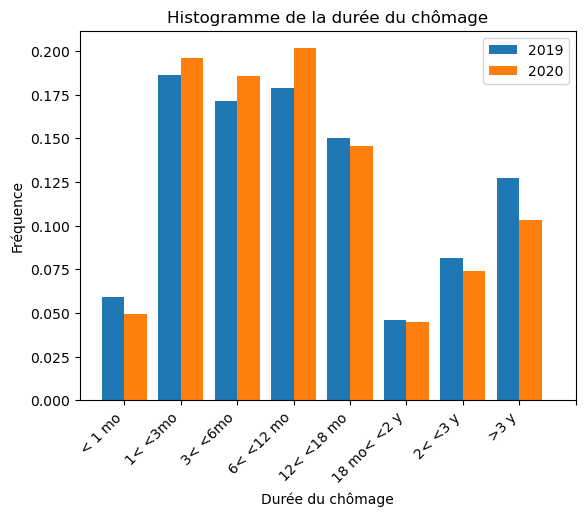

In [97]:
plt.hist([EEC_chom_2019["ANCCHOM"],EEC_chom_2020["ANCCHOM"]],bins=[i - 0.5 for i in range(1, 10)], weights = [EEC_chom_2019["EXTRIAN"],EEC_chom_2020["EXTRIAN"]], align='mid',width=0.4, density=True,label=["2019","2020"])
plt.title('Histogramme de la durée du chômage')
plt.xticks(range(1,10), ["< 1 mo","1< <3mo","3< <6mo","6< <12 mo","12< <18 mo","18 mo< <2 y","2< <3 y",">3 y",""], rotation=45, ha="right")
plt.xlabel('Durée du chômage')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

ValueError: Invalid RGBA argument: 3.0

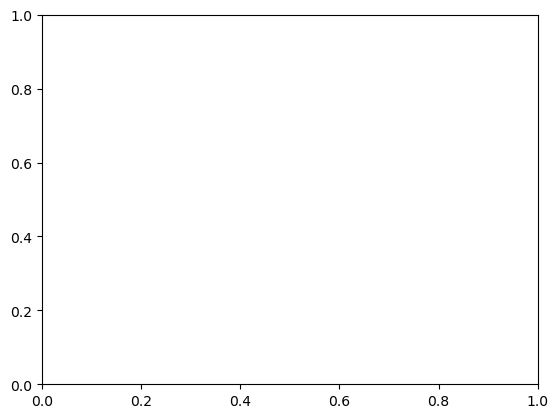

In [123]:
#Pourcentage de chômage par niveau d'éducation et CSP
plt.hist(EEC_2019["CSTOTR"],bins=[i - 0.35 for i in range(0, 9)], weights = EEC_2019["EXTRIAN"], align='mid',width=0.7, density=True, log=True, color=EEC_2019["ACTEU"])
plt.title('Fréquence du chômage en fonction de la catégorie socioprofessionnelle')
plt.xticks(range(0,9), ["Non-renseigné","Agriculteurs","Artisans, commerçants, chefs d'entreprise","Cadres et professions intellectuelles supérieures","Employés","Ouvriers","Inactifs ayant déja eu une activité pro","Chômeurs et inactifs n'ayant jamais travaillé",""], rotation=45, ha="right")
plt.xlabel('Catégorie socioprofessionnelle')
plt.ylabel('Fréquence')
plt.show()

In [75]:
EEC_2019[EEC_2019["IDENTM"]==2]

,ANNEE,TRIM,CATAU2010R,METRODOM,TYPMEN7,AGE3,AGE5,COURED,ENFRED,NFRRED,...,DIP11,CSTOTPRM,IDENTM,EXTRIAN,EMPNBH,HREC,HHCE,HPLUSA,JOURTR,NBTOTE
1,2019,2,1,1,3,50,60,1,2,1.0,...,50.0,64.0,2,46.173848,1.0,NaN,1.0,NaN,1.0,NaN
2,2019,2,1,1,3,50,60,1,2,1.0,...,70.0,64.0,2,46.173848,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Modélisation

In [2]:
# Choisit un set de variables qui ne comprend que données sociodémographiques, géographiques associées à l'individu
# et au ménage étudié + qui soit disponible sur les deux années étudiées

# Var d'interet -> ACTEU

# Var explicatives : AGE3 ;  AGE5 ; ANNEE ;TRIM ;  CATAU2010R ; COURED ; CSTOT (pour avoir actifs et inactifs) ;CSTOTR ;
# CSTOTPRM ; DIP11; ENFRED ; METRODOM ; NFRRED ; SEXE ; TYPMEN7 

# USE? -> AIDFAM , CHPUB?? (Employeur de la profession principale?), EXTRIAN? (pondération)

# Meme si les variables sont colinéaires (AGE3, AGE5), on peut les garder et faire en sorte que le predicteur
# choisisse la plus pertinente

list_var_selected = ["ACTEU","ANNEE" ,"TRIM", "AGE3" ,  "AGE5"  , "CATAU2010R" ,
"COURED" ,"CSTOT" ,"CSTOTR" ,"CSTOTPRM" , "DIP11","ENFRED" , "METRODOM" , "NFRRED" , "SEXE" , "TYPMEN7"]

EEC_2019 = EEC_2019[list_var_selected]
EEC_2020 = EEC_2020[list_var_selected]

list_var = list(EEC_2019.columns.values)
print(list_var)

EEC_2019 = EEC_2019[EEC_2019['TRIM'] ==1]
EEC_2020 = EEC_2020[EEC_2020['TRIM'] ==4]

# This method does not remove any observations here which indicates that there isn't any missing values in any variables
EEC_2019.dropna() 
EEC_2020.dropna() 

EEC_2019_subsample = EEC_2019.sample(n=1000, random_state=3) 



['ACTEU', 'ANNEE', 'TRIM', 'AGE3', 'AGE5', 'CATAU2010R', 'COURED', 'CSTOT', 'CSTOTR', 'CSTOTPRM', 'DIP11', 'ENFRED', 'METRODOM', 'NFRRED', 'SEXE', 'TYPMEN7']


In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(EEC_2019_subsample.drop(columns=["ACTEU","ANNEE", "TRIM"]))
X.shape
n_features = X.shape[1]

y = np.array(EEC_2019_subsample["ACTEU"])
# convert "Chomage" in 1 and the other labels (here, "Inactif", "Actif occupé") into 1
y = np.where(y==2, 1, 0)
y.shape

# ATTENTION -> TRANSFORMATION EN ARRAY SEMBLE INTRODUIRE DES NA? PAS BCP MAIS COMPRENDRE PQ


(1000,)

## Partie I: Preparation des données

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2)

In [5]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

print(X_test_scaled.shape)

# Identify rows with NaN values
nan_rows_train = np.isnan(X_train_scaled).any(axis=1)
# Remove rows with NaN values from both X_train_scaled and y_train
X_train_scaled = X_train_scaled[~nan_rows_train]
y_train = y_train[~nan_rows_train]

# Repeat the process for X_test_scaled and y_test
nan_rows_test = np.isnan(X_test_scaled).any(axis=1)
X_test_scaled = X_test_scaled[~nan_rows_test]
y_test = y_test[~nan_rows_test]

print(X_test_scaled.shape)

# Suppression d'un nombre très réduit d'observations

(200, 13)
(197, 13)


On normalise nos données de train car les algorithmes apprennent mieux sur ce type de données

## Partie II : Support Vector Machine

In [61]:
from sklearn.svm import SVC
#SVC est le modèle SVM permettant la classification

acc_train, acc_test = list(), list()

C_range = np.linspace(0.01, 1, 20)
for param in C_range:
    clf = SVC( C=param)
    clf.fit(X_train_scaled, y_train)
    acc_train.append(clf.score(X_train_scaled, y_train))
    acc_test.append(clf.score(X_test_scaled, y_test))


On choisit un modèle RBF car on ne connait pas la forme de la séparation dans nos données.
On entraine un premier classifieur SVM sur le jeu de données et on test plusieurs valeurs de C qui mesurent le niveau de régularisation (petites valeurs de C pour beaucoup régulariser).


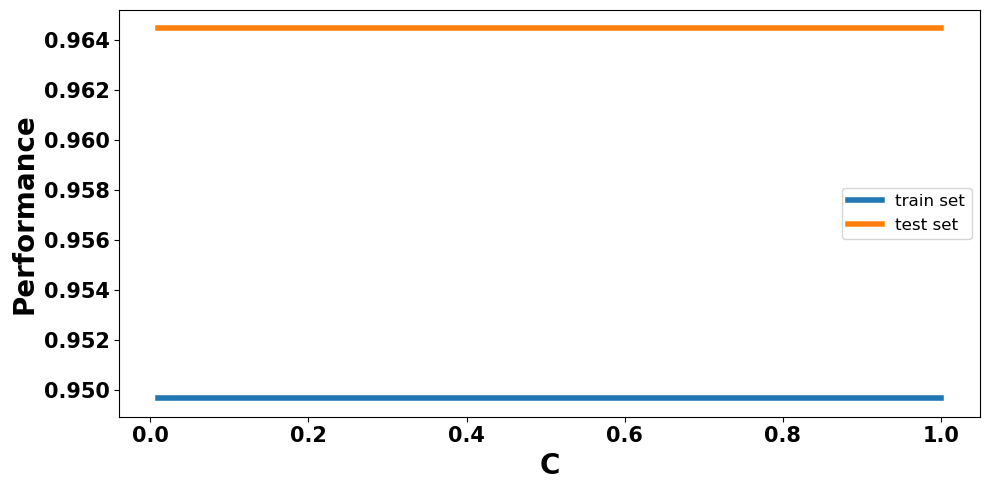

In [62]:
plt.figure(figsize=(10, 5))

plt.plot(C_range, acc_train, label='train set', lw=4)
plt.plot(C_range, acc_test, label='test set', lw=4)

plt.legend(loc='best', fontsize=12)

plt.xlabel("C", fontweight="bold", fontsize=20)
plt.ylabel("Performance", fontweight="bold", fontsize=20)
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

Le data-set compte peu de features par rapport au nombre d'observations.

Je vais essayer la régression logistique qui effectue naturellement une selection de variables. C grandit -> pas de régularisatin

 PB : Les résultats sont un peu bizarre car la performance sur le test set devrait évoluer quand C varie???


## Partie III - Regression logistique

In [63]:
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore", category=FutureWarning)

params= { 'C':[ 0.000001,0.001, 50]}

# j'essaie des valeurs de C très faible pour régulariser un maximum

lr =LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                   intercept_scaling=1, class_weight=None, random_state=3, solver='liblinear',
                   max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None,
                   l1_ratio=None)

# On découpe notre échantillon en 5 pour la cross-validation 

gs = GridSearchCV(estimator=lr, 
                   param_grid=params,
                   cv=5)

gs.fit(X_train_scaled, y_train)

print(gs.best_params_)
print(gs.score(X_train_scaled, y_train))
print(gs.score(X_test_scaled, y_test))

{'C': 1e-06}
0.949685534591195
0.9644670050761421


ATTENTION -> Best paramètre est toujours celui avec la régularisation la + forte -> ici C ~ 0 => BIZARRE

In [51]:
acc_train, acc_test = list(), list()
C_range = np.linspace(0.01, 0.1, 20)
for param in C_range:
    clf = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=param, fit_intercept=True, 
                   intercept_scaling=1, class_weight=None, random_state=3, solver='liblinear',
                   max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None,
                   l1_ratio=None)
    
    clf.fit(X_train_scaled, y_train)
    acc_train.append(clf.score(X_train_scaled, y_train))
    acc_test.append(clf.score(X_test_scaled, y_test))

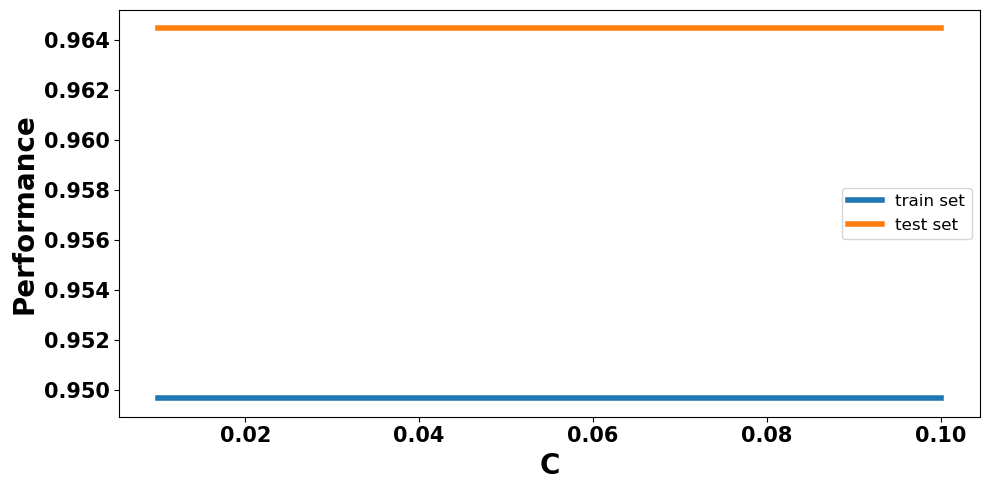

In [52]:
plt.figure(figsize=(10, 5))

plt.plot(C_range, acc_train, label='train set', lw=4)
plt.plot(C_range, acc_test, label='test set', lw=4)

plt.legend(loc='best', fontsize=12)

plt.xlabel("C", fontweight="bold", fontsize=20)
plt.ylabel("Performance", fontweight="bold", fontsize=20)
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()


## Partie IV : Selections de variables

In [53]:
print(X[:100]) 

[[15. 15.  1. ...  1.  2.  4.]
 [30. 30.  1. ...  3.  1.  1.]
 [15. 15.  1. ...  1.  1.  2.]
 ...
 [30. 40.  4. ...  1.  1.  4.]
 [15. 15.  2. ...  1.  2.  2.]
 [15. 15.  1. ...  1.  1.  4.]]


In [54]:

from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

# Identify rows with NaN values
nan_rows_train = np.isnan(X).any(axis=1)
# Remove rows with NaN values from both X_train_scaled and y_train
X_corrected = X[~nan_rows_train]
y_corrected = y[~nan_rows_train]

clf = LassoCV()

sfm = SelectFromModel(clf, threshold=None, prefit=False, norm_order=1, max_features=10)
# Je m'impose un maximum de 10 features

sfm.fit(X_corrected,y_corrected)
X_transform = sfm.transform(X_corrected)
print(X_transform.shape)

(992, 9)


Nous allons tester les performances de la regression logistique sur ce nouveau dataset

(793, 9)


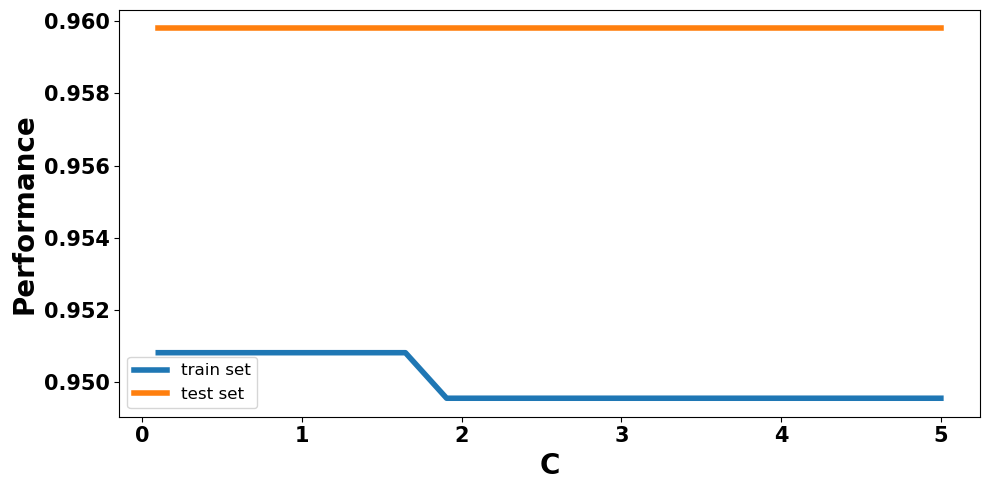

{'C': 0.001, 'penalty': 'l1', 'tol': 0.001}
0.9508196721311475
0.9597989949748744


In [60]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_transform, 
                                                    y, 
                                                    test_size=.2)

print(X_train_2.shape)

std_scale = StandardScaler().fit(X_train_2)
X_train_scaled_2 = std_scale.transform(X_train_2)
X_test_scaled_2 = std_scale.transform(X_test_2)
from sklearn.linear_model import LogisticRegression

acc_train, acc_test = list(), list()
C_range = np.linspace(0.1, 5, 20)
for param in C_range:
    clf = LogisticRegression(penalty='l2', dual=False, tol=0.001, C=param, fit_intercept=True, 
                   intercept_scaling=1, class_weight=None, random_state=3, solver='liblinear',
                   max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None,
                   l1_ratio=None)
    
    clf.fit(X_train_scaled_2, y_train_2)
    acc_train.append(clf.score(X_train_scaled_2, y_train_2))
    acc_test.append(clf.score(X_test_scaled_2, y_test_2))
    
plt.figure(figsize=(10, 5))

plt.plot(C_range, acc_train, label='train set', lw=4)
plt.plot(C_range, acc_test, label='test set', lw=4)

plt.legend(loc='best', fontsize=12)

plt.xlabel("C", fontweight="bold", fontsize=20)
plt.ylabel("Performance", fontweight="bold", fontsize=20)
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()


params= { 'C':[0.001, 1, 2], 'penalty': ['l1','l2'],'tol': [0.001,0.0001,0.1] }

# j'essaie des valeurs de C très faible pour régulariser un maximum

lr =LogisticRegression( dual=False, fit_intercept=True, 
                   intercept_scaling=1, class_weight=None, random_state=3, solver='liblinear',
                   max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None,
                   l1_ratio=None)

# On découpe notre échantillon en 3 pour la cross-validation (je pense qu'on peut difficilement faire plus car
# nous ne possédons que 542 observations)

gs = GridSearchCV(estimator=lr, 
                   param_grid=params,
                   cv=3)

gs.fit(X_train_scaled_2, y_train_2)

print(gs.best_params_)
print(gs.score(X_train_scaled_2, y_train_2))
print(gs.score(X_test_scaled_2, y_test_2))


Score baisse quand on impose un nombre fini de variables dans le modèle